**Task 3: Iris FLower Classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

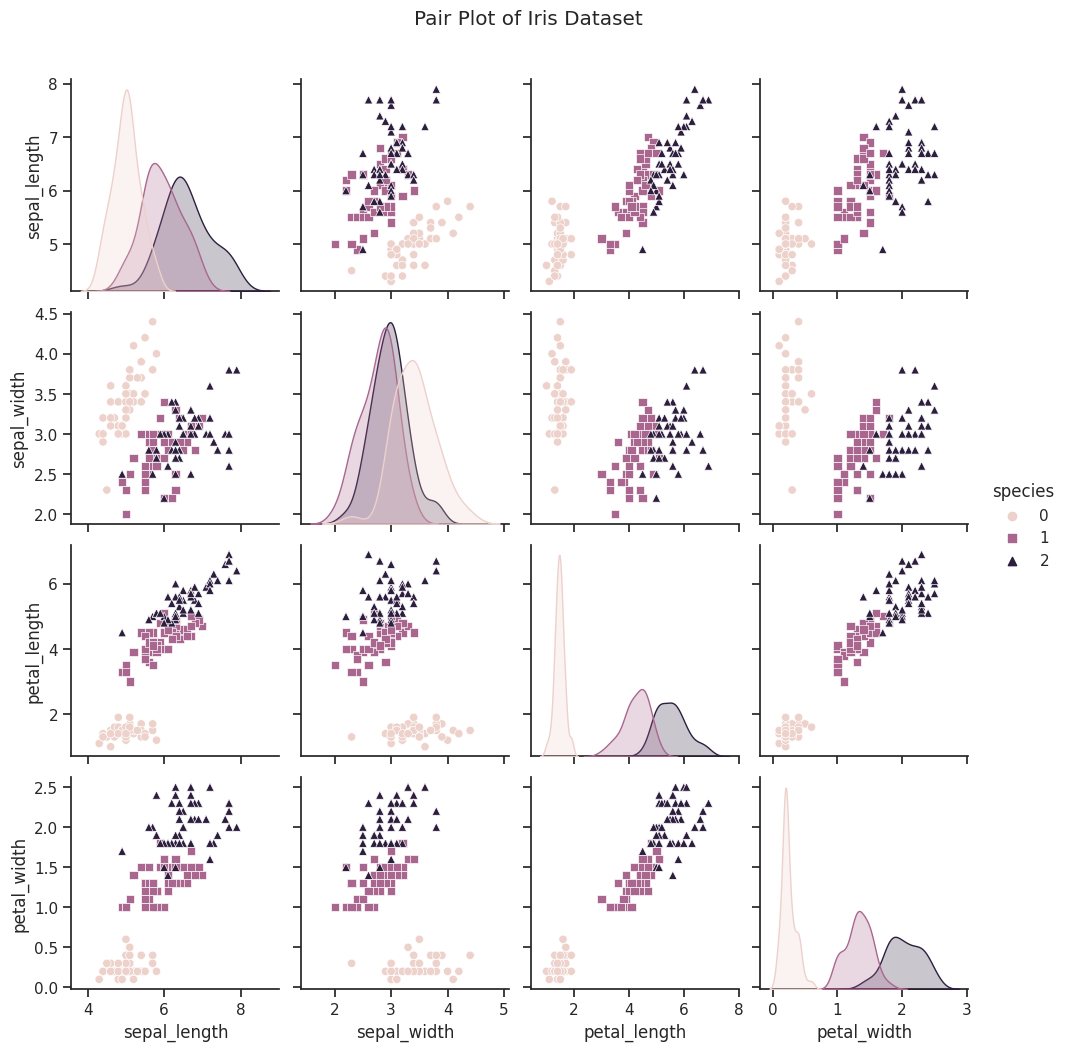

In [55]:
sns.set(style="ticks")
sns.pairplot(df, hue="species", markers=["o", "s", "^"])
plt.suptitle("Pair Plot of Iris Dataset", y=1.05)
plt.show()

In [14]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = df.drop(columns=['species'])
y = df['species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
print(y_test)

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
Name: species, dtype: int64


In [22]:
y_pred = KNN.predict(X_test)
print(y_pred)
# We can conclude that the prediction is accurate

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [29]:
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [47]:
print(X_test.head())

     sepal_length  sepal_width  petal_length  petal_width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.9           6.3          1.8
7             5.0          3.4           1.5          0.2


In [48]:
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

sample_input = [[sepal_length, sepal_width, petal_length, petal_width]]

Enter sepal length (cm): 5.0
Enter sepal width (cm): 3.4
Enter petal length (cm): 1.5
Enter petal width (cm): 0.2


In [49]:
predicted_label = KNN.predict(sample_input)
predicted_species = species_mapping[predicted_label[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [50]:
print("Predicted Species:", predicted_species)
print("Accuracy Score (in %):", KNN.score(X_test, y_test)*100)

Predicted Species: Iris-setosa
Accuracy Score (in %): 96.66666666666667
